In [1]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
from datacube import Datacube
from pprint import pprint
from odc.geo import resxy_

# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)

In [2]:
# Connect to datacube
dc = Datacube(app="Products_and_measurements")

## Product Discovery

In [3]:
# List Products
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
ls5_c2l2_sr,ls5_c2l2_sr,USGS Landsat t Collection 2 Level-2 Surface Reflectance,CC-BY-4.0,None,None
ls5_c2l2_st,ls5_c2l2_st,USGS Landsat 5 Collection 2 Level-2 Surface Temperature,CC-BY-4.0,None,None
ls7_c2l2_sr,ls7_c2l2_sr,USGS Landsat 7 Collection 2 Level-2 Surface Reflectance,CC-BY-4.0,None,None
ls7_c2l2_st,ls7_c2l2_st,USGS Landsat 7 Collection 2 Level-2 Surface Temperature,CC-BY-4.0,None,None
ls8_c2l2_sr,ls8_c2l2_sr,USGS Landsat 8 Collection 2 Level-2 Surface Reflectance,CC-BY-4.0,None,None
ls8_c2l2_st,ls8_c2l2_st,USGS Landsat 8 Collection 2 Level-2 Surface Temperature,CC-BY-4.0,None,None
ls9_c2l2_sr,ls9_c2l2_sr,USGS Landsat 9 Collection 2 Level-2 Surface Reflectance,CC-BY-4.0,None,None
ls9_c2l2_st,ls9_c2l2_st,USGS Landsat 9 Collection 2 Level-2 Surface Temperature,CC-BY-4.0,None,None
s2_l2a,s2_l2a,"Sentinel-2a, Sentinel-2b and Sentinel-2c imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",None,None,None


In [4]:
# List measurements
dc.list_measurements()

name   dtype         units  nodata  \
product     measurement                                                  
ls5_c2l2_sr blue                    blue  uint16             1       0   
            green                  green  uint16             1       0   
            red                      red  uint16             1       0   
            nir08                  nir08  uint16             1       0   
            swir16                swir16  uint16             1       0   
            swir22                swir22  uint16             1       0   
            qa_pixel            qa_pixel  uint16     bit_index       1   
            qa_radsat          qa_radsat  uint16     bit_index       0   
            atmos_opacity  atmos_opacity   int16             1   -9999   
            cloud_qa            cloud_qa   uint8     bit_index       0   
ls5_c2l2_st lwir                    lwir  uint16        Kelvin       0   
            TRAD                    TRAD   int16  W/(m2.sr.μm)   -9999   
            URAD                    URAD   int16  W/(m2.sr.μm)   -9999   
            DRAD                    DRAD   int16  W/(m2.sr.μm)   -9999   
            ATRAN                  ATRAN   int16             1   -9999   
            EMIS                    EMIS   int16             1   -9999   
            EMSD                    EMSD   int16             1   -9999   
            CDIST                  CDIST   int16    Kilometers   -9999   
            qa_pixel            qa_pixel  uint16     bit_index       1   
            qa_radsat          qa_radsat  uint16     bit_index       0   
            qa                        qa   int16        Kelvin   -9999   
ls7_c2l2_sr blue                    blue  uint16             1       0   
            green                  green  uint16             1       0   
            red                      red  uint16             1       0   
            nir08                  nir08  uint16             1       0   
            swir16                swir16  uint16             1       0   
            swir22                swir22  uint16             1       0   
            qa_pixel            qa_pixel  uint16     bit_index       1   
            qa_radsat          qa_radsat  uint16     bit_index       0   
            atmos_opacity  atmos_opacity   int16             1   -9999   
            cloud_qa            cloud_qa   uint8     bit_index       0   
ls7_c2l2_st lwir                    lwir  uint16        Kelvin       0   
            TRAD                    TRAD   int16  W/(m2.sr.μm)   -9999   
            URAD                    URAD   int16  W/(m2.sr.μm)   -9999   
            DRAD                    DRAD   int16  W/(m2.sr.μm)   -9999   
            ATRAN                  ATRAN   int16             1   -9999   
            EMIS                    EMIS   int16             1   -9999   
            EMSD                    EMSD   int16             1   -9999   
            CDIST                  CDIST   int16    Kilometers   -9999   
            qa_pixel            qa_pixel  uint16     bit_index       1   
            qa_radsat          qa_radsat  uint16     bit_index       0   
            qa                        qa   int16        Kelvin   -9999   
ls8_c2l2_sr coastal              coastal  uint16             1       0   
            blue                    blue  uint16             1       0   
            green                  green  uint16             1       0   
            red                      red  uint16             1       0   
            nir08                  nir08  uint16             1       0   
            swir16                swir16  uint16             1       0   
            swir22                swir22  uint16             1       0   
            qa_pixel            qa_pixel  uint16     bit_index       1   
            qa_radsat          qa_radsat  uint16     bit_index       0   
            qa_aerosol        qa_aerosol   uint8     bit_index       1   
ls8_c2l2_st lwir11                lwir11

## Dataset Searching & Querying

### Finding Dataset

In [5]:
datasets = dc.find_datasets(product="s2_l2a", limit=1)
datasets

Querying product Product(name='s2_l2a', id_=9)


[Dataset <id=1a0fa9b2-070a-5a81-98d1-2ee4fa745689 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T47NLB_20180211T035058_L2A>]

We can also search for datasets within a specific spatial extent or time period. To do this, we supply a spatiotemporal query (i.e. a range of x- and y-coordinates defining the spatial area to load, and a range of times).

`dc.find_datasets()` will then return a subset of datasets that match this query:

In [6]:
datasets = dc.find_datasets(
    product="s2_l2a",
    x=(114, 116),
    y=(-7, -9),
    time=("2020-01-01", "2020-01-02")
)
datasets

Querying product Product(name='s2_l2a', id_=9)


[Dataset <id=815e0877-67d0-5ae6-87ec-f2f8e0c513a8 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T49LHL_20200101T024527_L2A>,
 Dataset <id=9bb8606c-9b4c-5eb9-b62f-b256cc83a459 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T50LKR_20200101T024527_L2A>,
 Dataset <id=6176452b-f919-5132-9aeb-2f2aee8b051a product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T50MKT_20200101T024527_L2A>,
 Dataset <id=d2800846-1bec-549c-be5d-39d0155421ec product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T50MKS_20200101T024527_L2A>,
 Dataset <id=52f06461-98b4-52dd-99c7-3bea1f5fb60e product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T49MHN_20200101T024527_L2A>,
 Dataset <id=46e758fa-8333-52ec-bae4-9240d09a0aee product=s2_l2a location=h

### Inspecting Dataset

In [7]:
datasets[0].uris

/tmp/ipykernel_333/1531116856.py:1: ODC2DeprecationWarning: Call to deprecated function (or staticmethod) uris. (Multiple locations are now deprecated. Please use the 'uri' attribute instead.)
-- Deprecated since version 1.9.0.
  datasets[0].uris


['https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T49LHL_20200101T024527_L2A']

In [8]:
datasets[0].measurements

{'aot': {'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/AOT.tif'},
 'nir': {'grid': 'g10',
  'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/B08.tif'},
 'red': {'grid': 'g10',
  'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/B04.tif'},
 'scl': {'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/SCL.tif'},
 'wvp': {'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/WVP.tif'},
 'blue': {'grid': 'g10',
  'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/49/L/HL/2020/1/S2A_T49LHL_20200101T024527_L2A/B02.t

In [9]:
datasets[0].crs

CRS('EPSG:32749')

In [10]:
datasets[0].transform

Affine(109800.0, 0.0, 799980.0,
       0.0, -109800.0, 9100000.0)

In [11]:
# attributes and methods that are available
ds0 = datasets[0]
dir(ds0.metadata)

['cloud_cover',
 'creation_dt',
 'creation_time',
 'dataset_maturity',
 'format',
 'grid_spatial',
 'id',
 'instrument',
 'label',
 'lat',
 'lon',
 'measurements',
 'platform',
 'product_family',
 'region_code',
 'sources',
 'time']

In [12]:
ds0.metadata.cloud_cover

99.858433

In [13]:
getattr(ds0.metadata, 'cloud_cover')

99.858433

In [14]:
ds0.metadata.id

'815e0877-67d0-5ae6-87ec-f2f8e0c513a8'

In [15]:
ds0.metadata.lat

Range(begin=-9.124949795153519, end=-8.12502254507701)

In [16]:
ds0.metadata.lat.begin

-9.124949795153519

In [17]:
# pprint(vars(ds0))

## Load Data
Once you know the products or datasets that you are interested in, you can load data using `dc.load()`.

In [18]:
datasets_2 = dc.find_datasets(
    product="s2_l2a",
    x=(114, 115),
    y=(-7, -8),
    time=("2020-01-01", "2020-01-02")
)
datasets_2

Querying product Product(name='s2_l2a', id_=9)


[Dataset <id=6176452b-f919-5132-9aeb-2f2aee8b051a product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T50MKT_20200101T024527_L2A>,
 Dataset <id=d2800846-1bec-549c-be5d-39d0155421ec product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T50MKS_20200101T024527_L2A>,
 Dataset <id=52f06461-98b4-52dd-99c7-3bea1f5fb60e product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T49MHN_20200101T024527_L2A>,
 Dataset <id=46e758fa-8333-52ec-bae4-9240d09a0aee product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a/items/S2A_T49MHM_20200101T024527_L2A>]

In [19]:
pprint(datasets_2[0].measurements)

{'aot': {'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/50/M/KT/2020/1/S2A_T50MKT_20200101T024527_L2A/AOT.tif'},
 'blue': {'grid': 'g10',
          'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/50/M/KT/2020/1/S2A_T50MKT_20200101T024527_L2A/B02.tif'},
 'cloud': {'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/50/M/KT/2020/1/S2A_T50MKT_20200101T024527_L2A/CLD_20m.tif'},
 'coastal': {'grid': 'g60',
             'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/50/M/KT/2020/1/S2A_T50MKT_20200101T024527_L2A/B01.tif'},
 'green': {'grid': 'g10',
           'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/sentinel-2-c1-l2a/50/M/KT/2020/1/S2A_T50MKT_20200101T024527_L2A/B03.tif'},
 'nir': {'grid': 'g10',
         'path': 'https://e84-earth-search-sentinel-data.s3.us-west-2.amazonaws.com/senti

In [20]:
print("Available measurements:")
for meas in datasets_2[0].measurements.keys():
    print(meas)

Available measurements:
aot
nir
red
scl
wvp
blue
snow
cloud
green
nir08
nir09
swir16
swir22
visual
coastal
rededge1
rededge2
rededge3


In [21]:
ds2 = dc.load(
    datasets=datasets_2,
    measurements= ["red", "blue", "green"],
    output_crs="EPSG:4326", 
    resolution=resxy_(-0.01, 0.01)
)

In [22]:
ds2

<xarray.Dataset> Size: 731kB
Dimensions:      (time: 4, latitude: 192, longitude: 158)
Coordinates:
  * time         (time) datetime64[ns] 32B 2020-01-01T02:49:36.981000 ... 202...
  * latitude     (latitude) float64 2kB -8.225 -8.215 -8.205 ... -6.325 -6.315
  * longitude    (longitude) float64 1kB 115.3 115.3 115.3 ... 113.7 113.7 113.7
    spatial_ref  int32 4B 4326
Data variables:
    red          (time, latitude, longitude) uint16 243kB 0 0 0 0 0 ... 0 0 0 0
    blue         (time, latitude, longitude) uint16 243kB 0 0 0 0 0 ... 0 0 0 0
    green        (time, latitude, longitude) uint16 243kB 0 0 0 0 0 ... 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

We can see that `dc.load` has returned an `xarray.Dataset` containing data from our two input datasets. 

> This `xarray.Dataset` includes:  
> **Dimensions**  
> This header identifies the number of timesteps returned (time: 2) as well as the number of resulting pixels in the `x` and `y` directions.
> 
> **Coordinates**  
> - time identifies the time attributed to each returned timestep.
> - x and y provide coordinates for each pixel within the returned data.  
> - spatial_ref provides information about the spatial grid used to load the data
> 
>**Data variables**  
> These are the measurements available for the loaded product.
> For every timestep (time) returned by the query, the measured value at each pixel (y, x) is returned as an array for each measurement.
> Each data variable is itself an `xarray.DataArray` object.
> 
> **Attributes**  
> Other important metadata or attributes for the loaded data

We can also inspect our loaded data by plotting it:

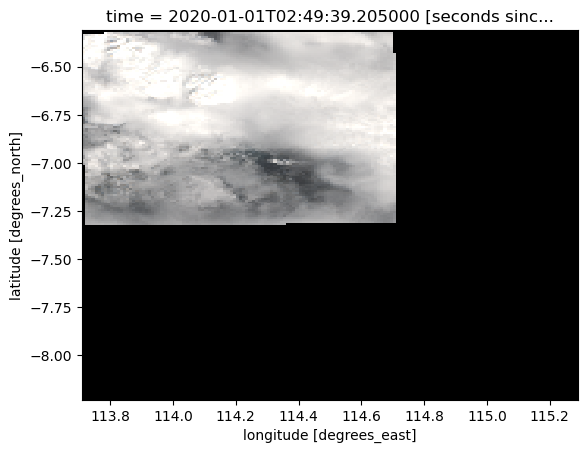

In [23]:
# Plot the data (using the correct variable name)
ds2.isel(time=1)[["red", "green", "blue"]].to_array().plot.imshow(robust=True)